# EDA and Statistical Analysis of Mod Clothing Dataset

## PART-A ( Concept Based)--25 points

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
from scipy.stats import randint
from scipy.stats import skewnorm
from math import factorial
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [13]:
l=[23, 30, 20, 27, 44, 26, 35, 20, 29, 29,25, 15, 18, 27, 19, 22, 12, 26, 34, 15,27 ,35, 26, 43, 35, 14, 24, 12, 23, 31,
40, 35, 38, 57, 22, 42, 24, 21, 27, 33]
df=pd.DataFrame({'price':l})
df.head()

,price
0,23
1,30
2,20
3,27
4,44


## Q1. Compute the mean, median and the mode of the data


In [14]:
mean=df['price'].mean()
median=df['price'].median()
mode=df['price'].mode()

print('The mean of price is ',mean)
print('The median of price is ',median)
print('The mode of price is\n',mode)

The mean of price is  27.625
The median of price is  26.5
The mode of price is
 0    27
1    35
Name: price, dtype: int64


## Q2. Compute the range , variance and standard deviation of the data

In [15]:
Ran=df['price'].max()-df['price'].min()
variance=df['price'].var()
std=df['price'].std()

print('The range is ',Ran)
print('The variance is ',variance)
print('The standard deviation is ',std)

The range is  45
The variance is  92.59935897435898
The standard deviation is  9.622856071580774


## Q3.Find the mean deviation for the data.

In [16]:
# mean deviation
n=len(df)
x_bar=np.mean(df['price'])
md= sum(np.abs(df['price']-x_bar)/n)
print('The Mean Deviation is ',md)

The Mean Deviation is  7.400000000000001


## Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data


In [17]:
skew=(3*(mean-median))/std
print('The skewness of the data is ',skew)

The skewness of the data is  0.3507274737245009


## Q5. Count the number of data values that fall within two standard deviations ofthe mean. Compare this with the answer from Chebyshev’s Theorem.

In [18]:
left_standard_deviation=mean-(2*std)
right_standard_deviation=mean+(2*std)
values_fall=df[(df['price']>=left_standard_deviation)&(df['price']<=right_standard_deviation)]
count=len(values_fall)
print(count,'observations fall between 2 standard deviations')

39 observations fall between 2 standard deviations


In [19]:
percentage=(count/len(df))*100
print(percentage,'% falls in 2 standard deviation')

97.5 % falls in 2 standard deviation



## Q6. Find the three quartiles and the interquartile range (IQR).

In [20]:
Q1=df['price'].quantile(0.25)
Q2=df['price'].quantile(0.50)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
print('The First Quantile  is ',Q1)
print('The Second Quantile is ',Q2)
print('The Third Quantile  is ',Q3)
print('The Inter Quantile Range is ',IQR)

The First Quantile  is  21.75
The Second Quantile is  26.5
The Third Quantile  is  34.25
The Inter Quantile Range is  12.5


## Q7. Are there any outliers in the data set ?

In [21]:
LL=Q1-(1.5*IQR)
UL=Q3+(1.5*IQR)
df[(df['price']<=LL)|(df['price']>=UL)]

,price
33,57


There is one outlier

## Q8. Draw a boxplot of the dataset to confirm .

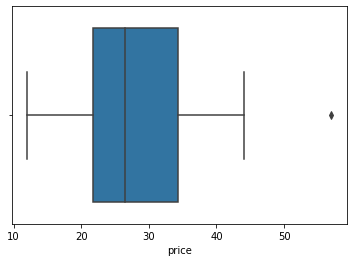

In [22]:
sns.boxplot(data=df,x='price')
plt.show()

## Q9. Find the percentile rank of the datapoint 25.


In [23]:
df['rank']=df['price'].rank(pct=True)*100
df[df['price']==25]

,price,rank
10,25,42.5


## Q10. What is the probability that a shirt cost is above 25 dollars?

In [24]:
favorable_outcomes=len(df[df['price']>25])
total_outcomes=len(df)
probability=favorable_outcomes/total_outcomes
print("The probability that a shirt cost is above 25 dollars is ",probability)

The probability that a shirt cost is above 25 dollars is  0.575


## Q11. Create a frequency distribution for the data and visualize it appropriately

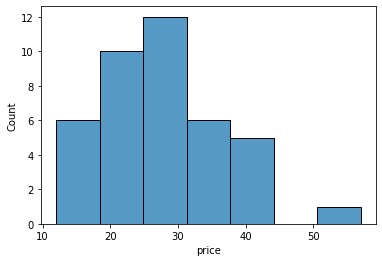

In [25]:
sns.histplot(data=df,x='price')
plt.show()

## Q12. Create a probability distribution of the data and visualize it appropriately. 

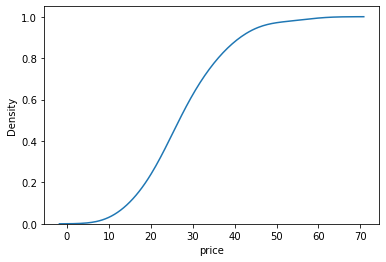

In [26]:
sns.kdeplot(data=df,x='price',cumulative=True)
plt.show()

## Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean shirt prices. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?


In [27]:
df.shape

(40, 2)

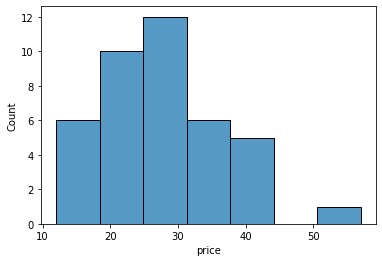

In [28]:
sns.histplot(data=df,x='price')
plt.show()

In [32]:
def sampling_distribution(x,no_of_sample,sample_size):
    sample_mean_list=[]
    for i in range(no_of_sample):
        sample=np.random.choice(x,sample_size)
        sample_mean=np.mean(sample)
        sample_mean_list.append(sample_mean)
    return sample_mean_list    

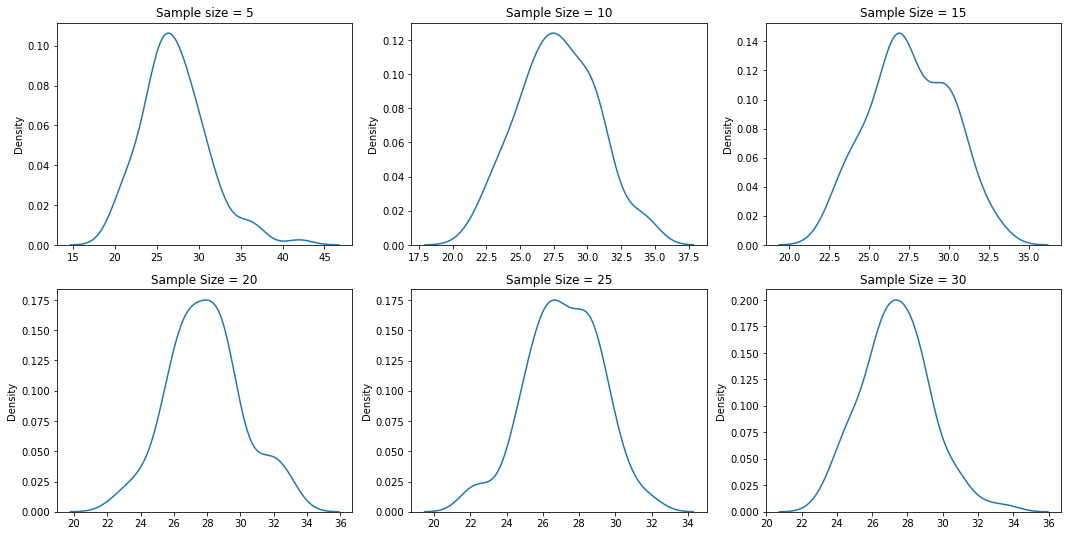

In [33]:
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
sns.kdeplot(x=sampling_distribution(df['price'],100,5))
plt.title('Sample size = 5')
plt.subplot(2,3,2)
sns.kdeplot(x=sampling_distribution(df['price'],100,10))
plt.title("Sample Size = 10")
plt.subplot(2,3,3)
sns.kdeplot(x=sampling_distribution(df['price'],100,15))
plt.title("Sample Size = 15")
plt.subplot(2,3,4)
sns.kdeplot(x=sampling_distribution(df['price'],100,20))
plt.title("Sample Size = 20")
plt.subplot(2,3,5)
sns.kdeplot(x=sampling_distribution(df['price'],100,25))
plt.title("Sample Size = 25")
plt.subplot(2,3,6)
sns.kdeplot(x=sampling_distribution(df['price'],100,30))
plt.title("Sample Size = 30")
plt.show()

## Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars?

In [34]:
n=10
x=7
p=len(df[df['price']>25])/len(df)
probability=stats.binom.pmf(x,n,p)
print('The probability that sample of 10 shirts 7 are costing more than 25 dollars ',probability)

The probability that sample of 10 shirts 7 are costing more than 25 dollars  0.19143570809682064


## Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars

In [35]:
n=10
x=7
print(f"The probability that out of a random sample of 100 young adults were exactly 50 are having BMI greater than 25 is {stats.binom.pmf(x,n,p)}")

The probability that out of a random sample of 100 young adults were exactly 50 are having BMI greater than 25 is 0.19143570809682064


## Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [36]:
c=0.95
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
x_bar=df['price'].mean()
std=df['price'].std()
n=len(df)

# margin of error
me=(z_alpha*std)/np.sqrt(n)

# confidence inteval
CI=(x_bar-me),(x_bar+me)
print('Confidence inteval for population of young adults is:\n ',CI)

Confidence inteval for population of young adults is:
  (24.642900805126224, 30.607099194873776)



## Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [37]:
c=0.95
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
me=0.02
p=0.60
q=1-p

# sample size
n=(z_alpha*(np.sqrt(p*q)/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  2305


## Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [154]:
c=0.90
alpha=1-c
z_alpha=stats.norm.isf(alpha/2)
me=0.05
p=0.60
q=1-p

# sample size
n=(z_alpha*(np.sqrt(p*q)/me))**2
print('The minimum sample size is ',round(n))

The minimum sample size is  260


## Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars.

In [155]:

# testing hypothesis
# ho:mu=0.80
# ha:mu<>0.80

# decision criteria
alpha=0.05
z_alpha=stats.norm.ppf(alpha/2)

# sample statistics
n=30
x=23
p=x/n
p_bar=0.80
z=(p-p_bar)/np.sqrt((p_bar*(1-p_bar))/n)
print('z_alpha is ',round(z_alpha,3))
print('z is ',round(z,3))

z_alpha is  -1.96
z is  -0.456


## Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.

###  a. What hypothesis would he use to compare the shirt prices of NuCloth vs Supermarket

### b. What are critical values to be used?


In [38]:
alpha=0.05
x1=36
x2=34
s1=7.6
s2=5.8
n1=100
n2=100


### c. What statistical test will be used to compare these prices?

### d. Complete the test and obtain the P-value.

In [39]:
# decision criteria
z_alpha=stats.norm.isf(alpha)
print('z_alpha is ',round(z_alpha,4))

# sample statistic

z=(x1-x2)/np.sqrt(((s1**2)/n1)+((s2**2)/n2))
print('The z is ',round(z,3))

# p_value

p_value=stats.norm.sf(z)
print('The p_value is ',round(p_value,3))
print('The alpha is',alpha)


z_alpha is  1.6449
The z is  2.092
The p_value is  0.018
The alpha is 0.05


### e. Summarize his conclusion based on the P-value.

# PART-B ( Dataset Based)--25 points

## 1. Read the datasets, Check the data types and Change the data types appropriately.

In [40]:
df=pd.read_json('modcloth_final_data.json',lines=True)
df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [42]:
df.dtypes

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [43]:
# converting to object
df['item_id']=df['item_id'].astype('O')
df['user_id']=df['user_id'].astype('O')

In [44]:
df.dtypes

item_id            object
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id            object
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [45]:
df['height'].unique()

array(['5ft 6in', '5ft 2in', '5ft 7in', nan, '5ft 4in', '5ft 3in',
       '5ft 5in', '5ft 10in', '5ft 8in', '5ft', '5ft 9in', '5ft 1in',
       '5ft 11in', '4ft 11in', '4ft 10in', '6ft', '3ft 4in', '4ft 9in',
       '6ft 3in', '6ft 1in', '6ft 2in', '3ft', '4ft 7in', '4ft 4in',
       '7ft 11in', '4ft 2in', '6ft 6in', '4ft 8in', '6ft 4in', '3ft 11in',
       '6ft 5in', '7ft 6in', '3ft 6in', '3ft 3in', '6ft 8in', '7ft 5in',
       '7ft 3in', '7ft 7in', '6ft 7in', '4ft 5in', '3ft 2in', '4ft 6in'],
      dtype=object)

## 2. Change the height column datatype to float after converting the values

In [46]:
df['height']=list(map(lambda x : str(x).replace(' ','.').replace('ft','').replace('in',''),df['height']))
df['height']=df['height'].astype(float)
df['height'].dtypes

dtype('float64')

## 3. Rename the names of the columns which have space in between the column.
Ex: shoe size as shoe_size etc.

In [53]:
df=df.rename(columns={'cup size':'cup_size','bra size':'bra_size','shoe size':'shoe_size','shoe width':'shoe_width'})
df.head(2)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN


## 4. Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.
Note: Kindly copy the datasets and work on the new data frame

In [49]:
df1=df.copy()
df1.head(2)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN


### 4.1 Check the count and percentage of missing values.


In [54]:
sum=df1.isnull().sum()
sum

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [55]:
# percentage of missing values
(sum/len(df))*100

item_id            0.000000
waist             96.518903
size               0.000000
quality            0.082136
cup_size           7.555260
hips              32.281677
bra_size           7.268994
category           0.000000
bust              85.681846
height             1.337118
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe_size         66.282160
shoe_width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

### 4.2 check the Mean and Median.

In [56]:
# mean
df1.mean()

item_id      469325.229170
waist            31.319223
size             12.661602
quality           3.949058
hips             40.358501
bra_size         35.972125
height            5.456365
user_id      498849.564718
shoe_size         8.145818
dtype: float64

In [57]:
# median
df1.median()

item_id      454030.0
waist            30.0
size             12.0
quality           4.0
hips             39.0
bra_size         36.0
height            5.5
user_id      497913.5
shoe_size         8.0
dtype: float64

In [22]:
df1.dtypes

item_id            object
waist             float64
size                int64
quality           float64
cup_size           object
hips              float64
bra_size          float64
category           object
bust               object
height            float64
user_name          object
length             object
fit                object
user_id            object
shoe_size         float64
shoe_width         object
review_summary     object
review_text        object
dtype: object

### 4.3 Check the distribution of the variables using Histogram or Dist plot or KDE and boxplot etc. Kindly explore at least two

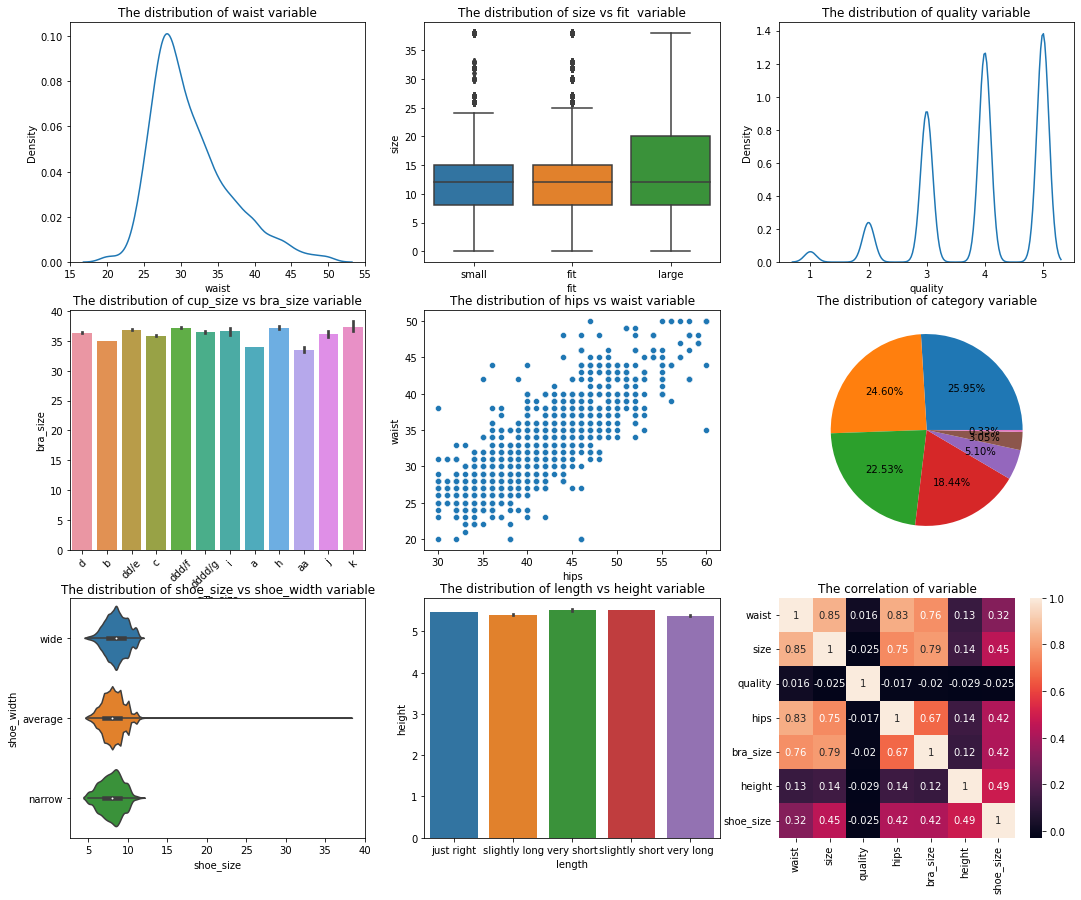

In [58]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
sns.kdeplot(df1['waist'])
plt.title('The distribution of waist variable')
plt.subplot(3,3,2)
sns.boxplot(data=df1,y='size',x='fit')
plt.title('The distribution of size vs fit  variable')
plt.subplot(3,3,3)
sns.kdeplot(data=df1,x='quality')
plt.title('The distribution of quality variable')
plt.subplot(3,3,4)
sns.barplot(data=df1,x='cup_size',y='bra_size')
plt.title('The distribution of cup_size vs bra_size variable')
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.scatterplot(data=df1,x='hips',y='waist')
plt.title('The distribution of hips vs waist variable')
plt.subplot(3,3,6)
plt.pie(df1['category'].value_counts(),autopct='%.2f%%')
plt.title('The distribution of category variable')
plt.subplot(3,3,7)
sns.violinplot(data=df1,x='shoe_size',y='shoe_width')
plt.title('The distribution of shoe_size vs shoe_width variable')
plt.subplot(3,3,8)
sns.barplot(data=df1,x='length',y='height')
plt.title('The distribution of length vs height variable')
plt.subplot(3,3,9)
sns.heatmap(df.corr(),annot=True)
plt.title('The correlation of variable')
plt.show()

### 4.4 Check the Skewness and Kurtosis. Explain what the Skewness and Kurtosis describe

In [24]:
#skewness
print('Skewness of the variable :')
df1.skew()

Skewness of the variable :


item_id     -0.120644
waist        0.993061
size         1.128301
quality     -0.676777
hips         0.969187
bra_size     0.901004
height      -1.095275
user_id      0.008201
shoe_size    0.436713
dtype: float64

In [25]:
#Kurtorsis
print('Kurtorsis of the variable :')
df1.kurt()

Kurtorsis of the variable :


item_id     -1.215909
waist        0.836624
size         0.760010
quality     -0.167085
hips         0.848464
bra_size     1.039445
height       5.311308
user_id     -1.182436
shoe_size    8.448820
dtype: float64

**skewness:**
Skewness refers to the degree of symmetry, or more precisely, the degree of lack of symmetry.The value of the coefficient if skewness usually ranges from –3 to 3.
1. When the distribution is symmetric, the coefficient is zero
2. when the distribution is positively skewed , the coefficient is positive
3. when the distribution is negatively skewed the coefficient is negative. 

**Kurtosis:**
Kurtosis refers to the proportion of data that is heavy-tailed or light-tailed in comparison with a normal distribution.
1. When k>0 it is said to be leptokurtic
2. When k=0 it is said to be mesokurtic
3. When k<0 it is said to be platykurtic. 

### 4.5 Based on the above approach impute the missing values with the right metric. Or If you want to get some analysis before imputing missing values feel free to explore the analysis.

In [26]:
(sum/len(df))*100

item_id            0.000000
waist             96.518903
size               0.000000
quality            0.082136
cup_size           7.555260
hips              32.281677
bra_size           7.268994
category           0.000000
bust              85.681846
height             1.337118
user_name          0.000000
length             0.042276
fit                0.000000
user_id            0.000000
shoe_size         66.282160
shoe_width        77.525063
review_summary     8.122962
review_text        8.122962
dtype: float64

In [27]:
# waist,bust column has above 85 % of null-values so we drop that column
df1.drop(columns=['waist','bust'],inplace=True)

In [28]:
# shoe_width column

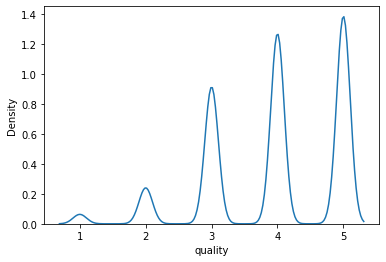

In [29]:
# quality column has 0.8% has null-values. 
sns.kdeplot(df1['quality'])
df1['quality']=df1['quality'].fillna(df1['quality'].median())

it is symmentric but the quality cannot be replaced with mean so we impute by median

In [30]:
# cup_size column has 7.5 % of missing values 
# its catergorial so we fill by mode
df1['cup_size']=df1['cup_size'].fillna(df1['cup_size'].mode()[0])

0.9691874732078445

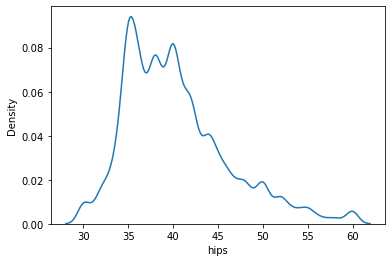

In [31]:
# hips column has 32.2 % of missing values 
# we fill by median
sns.kdeplot(df1['hips'])
df1['hips'].skew()

<AxesSubplot:>

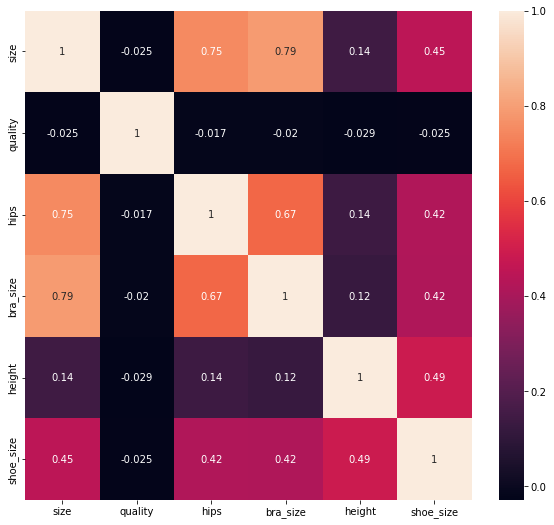

In [32]:
plt.figure(figsize=(10,9))
sns.heatmap(df1.corr(),annot=True)

In [33]:
df1['hips']=df1['hips'].fillna(df1.groupby('size')['hips'].median())   #doubt

we do groupby with hips column because both column as positive relation and hips size can be besr determined for null values 


In [34]:
# bra_size column has 7.2 % of missing values 
#  so we fill by median
df1['bra_size']=df1['bra_size'].fillna(df1['bra_size'].median())

In [35]:
# height column has 1.3 % of missing values 
# we drop the records
df1=df1.dropna(subset='height')

In [36]:
# length column has 35  missing values 
# we drop the records
df1=df1.dropna(subset='length')

In [37]:
df1['height'].unique()

array([5.6 , 5.2 , 5.7 , 5.4 , 5.3 , 5.5 , 5.1 , 5.8 , 5.  , 5.9 , 5.11,
       4.11, 4.1 , 6.  , 3.4 , 4.9 , 6.3 , 6.1 , 6.2 , 3.  , 4.7 , 4.4 ,
       7.11, 4.2 , 6.6 , 4.8 , 6.4 , 3.11, 6.5 , 7.6 , 3.6 , 3.3 , 6.8 ,
       7.5 , 7.3 , 7.7 , 6.7 , 4.5 , 3.2 , 4.6 ])

In [38]:
# shoe_size column has 66.2 % of missing values 
# so we fill by                               # doubt 

In [39]:
# review_summary and review_text columns has 8.122 % each of missing values 
# we fill by no review as there is no review received from that customer.
df1[['review_summary','review_text']]=df1[['review_summary','review_text']].fillna('no review')

In [40]:
df1.isnull().sum()

item_id               0
size                  0
quality               0
cup_size              0
hips              25826
bra_size              0
category              0
height                0
user_name             0
length                0
fit                   0
user_id               0
shoe_size         54110
shoe_width        63252
review_summary        0
review_text           0
dtype: int64



## 5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3. 

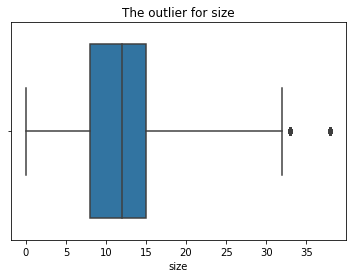

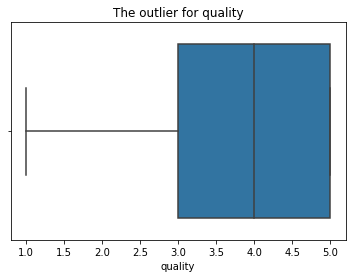

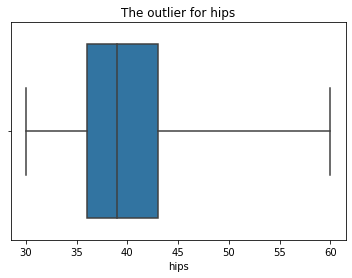

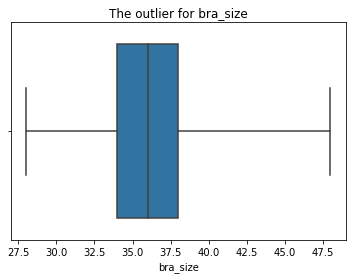

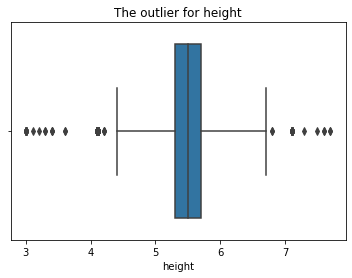

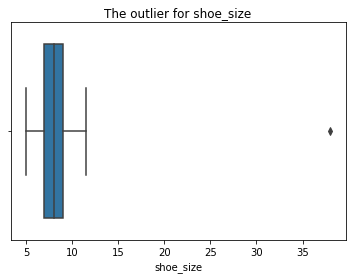

In [41]:
num=df1.select_dtypes(include=np.number).columns
for i in num:
    plt.title(f"The outlier for {i}")
    sns.boxplot(df1[i],whis=2.5)
    plt.show()

In [42]:
Q1=df1.quantile(0.25)                                    # doubt
Q2=df1.quantile(0.50)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
LL=(2.5*IQR)-Q1
UL=(2.5*IQR)+Q3
a=df1[(df1<LL)|(df1>UL)]
a[a.duplicated()]

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
2,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
for i in num:
    Q1=df1[i].quantile(0.25)
    Q2=df1[i].quantile(0.50)
    Q3=df1[i].quantile(0.75)
    IQR=Q3-Q1
    LL=(2.5*IQR)-Q1
    UL=(2.5*IQR)+Q3
    a=df1[(df1[i]<LL)|(df1[i]>UL)]
    print(f"The number of outliers of {i} column is {len(a)}")


The number of outliers of size column is 38062
The number of outliers of quality column is 1321
The number of outliers of hips column is 0
The number of outliers of bra_size column is 0
The number of outliers of height column is 31
The number of outliers of shoe_size column is 1


In [44]:
# outliers=pd.DataFrame({})
# for i in num:
#     Q1=df1[i].quantile(0.25)
#     Q2=df1[i].quantile(0.50)
#     Q3=df1[i].quantile(0.75)
#     IQR=Q3-Q1
#     LL=(2.5*IQR)-Q1
#     UL=(2.5*IQR)+Q3
#     a=df1[(df1[i]<LL)|(df1[i]>UL)]
# #     print(a,axis=0)
#     print(pd.concat(outliers,a))

## 6.Check for the category dress review and visualize the top 10 reviews using any relevant plot. Identify the negative reviews if there are any.

In [45]:
a=df1[df1['category']=='dresses']

<AxesSubplot:>

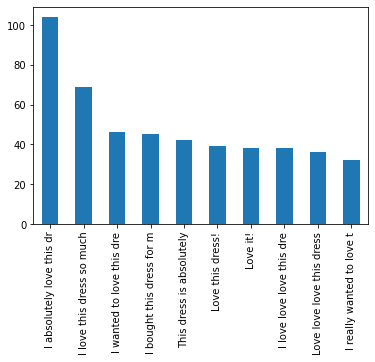

In [46]:
a['review_summary'].value_counts().head(10).plot(kind='bar')

There are no negative reviews in top 10 reviews

## 7. Find out the average shoe size for the different fits of the customer. Visualize  using any relevant plot. Explain that, Is there any significant different shoe sizes for different fits?

In [47]:
df1.groupby('fit')['shoe_size'].mean()

fit
fit      8.096849
large    8.206374
small    8.298404
Name: shoe_size, dtype: float64

<AxesSubplot:xlabel='fit'>

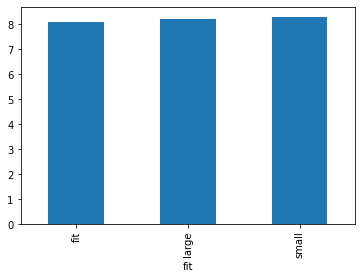

In [48]:
df1.groupby('fit')['shoe_size'].mean().plot(kind='bar')

## 8. Identify the customer’s common shoe width and average size for those who purchased the maximum quality. Is the mode of shoe width affect the user review? Visualize using the appropriate plot

In [49]:
df1['quality'].max()

5.0

In [50]:
df1[df1['quality']==5]['shoe_width'].mode()[0]

'average'

In [51]:
df1[df1['quality']==5]['shoe_size'].mean()

8.11036339165545

In [52]:
a=df1[df1['shoe_width']=='average']
a

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
21,123373,5,5.0,b,45.0,34.0,new,5.7,dputvin,just right,large,4905,7.0,average,no review,no review
23,123373,5,5.0,c,32.0,34.0,new,5.1,Michelle,just right,small,990166,7.0,average,no review,no review
36,123373,18,5.0,c,NaN,36.0,new,5.7,Angela,just right,fit,634656,8.5,average,no review,no review
40,123373,18,5.0,ddd/f,44.0,38.0,new,5.4,Michelle,just right,small,889569,8.5,average,no review,no review
49,123373,11,5.0,c,37.0,36.0,new,5.2,Janine,slightly long,small,117413,6.0,average,no review,no review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82771,807722,8,4.0,b,NaN,34.0,outerwear,5.8,Kat,just right,fit,975516,8.5,average,Great color and fit. You,Great color and fit. You can dress this up or ...
82775,807722,12,4.0,ddd/f,40.0,34.0,outerwear,5.4,beezy13,just right,fit,808373,9.0,average,I love this jacket; it lo,I love this jacket; it looks great with a lot ...
82779,807722,12,4.0,dd/e,38.0,36.0,outerwear,5.7,lmoore81,just right,small,370303,7.5,average,Got this in black and rec,Got this in black and received so many complim...
82784,807722,4,3.0,a,35.0,32.0,outerwear,5.1,ciwheeles,just right,large,317420,6.5,average,"It ran a little big, and","It ran a little big, and I'm not crazy about t..."


## 9. Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup sizes. The basic analysis explains what you would try to infer. Try to use visualization.

In [53]:

df1['review_summary'].value_counts().head(10)        #dbt

no review                    6619
Love it!                      182
I absolutely love this dr     123
I really wanted to love t      92
Love it                        91
I love this dress so much      83
This is one of my favorit      83
.                              75
I get so many compliments      70
Perfect!                       69
Name: review_summary, dtype: int64

## 10. Identify the most common review that we got from the customer whose hips size is greater than 35. Find out what kind of inference you can make

In [54]:
a=df1[df1['hips']>35]                          # cleaned df       
a['review_summary'].mode()[0]

'no review'

In [55]:
a=df[df['hips']>35]                     # done in df as imputation mistake
a['review_summary'].mode()[0]

'Love it!'

## 11. What is the relationship between height and weight? Describe what kind of relationship it has.

In [56]:
df1

,item_id,size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,5.6,Emily,just right,small,991571,NaN,NaN,no review,no review
1,123373,13,3.0,b,30.0,36.0,new,5.2,sydneybraden2001,just right,small,587883,NaN,NaN,no review,no review
2,123373,7,2.0,b,35.0,32.0,new,5.7,Ugggh,slightly long,small,395665,9.0,NaN,no review,no review
4,123373,18,5.0,b,36.0,36.0,new,5.2,dberrones1,slightly long,small,944840,NaN,NaN,no review,no review
5,123373,11,5.0,c,41.0,36.0,new,5.4,Doreenajane,just right,small,162012,NaN,NaN,no review,no review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36.0,outerwear,5.8,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,NaN,34.0,outerwear,5.5,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,5.4,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,12,4.0,c,NaN,36.0,outerwear,5.3,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


## 12. Plot the pair plot for the numerical plot. Explain according to your problem statement how the pair plot would help you.
Problem Statement:
Let’s assume you are working as a data scientist in a newly started textile company.
You have given a dataset that consists of most of the features related to the
measurements, clothes types, Product ID, User ID, etc. Now you suppose to work the
dataset to identify the patterns to understand the customer’s preferred brands and how
the company needs to brand its products based on the patterns that you will be found
them out. Explore all the EDA concepts you learned and use a statistical test to ensure
that your identification is true or false.


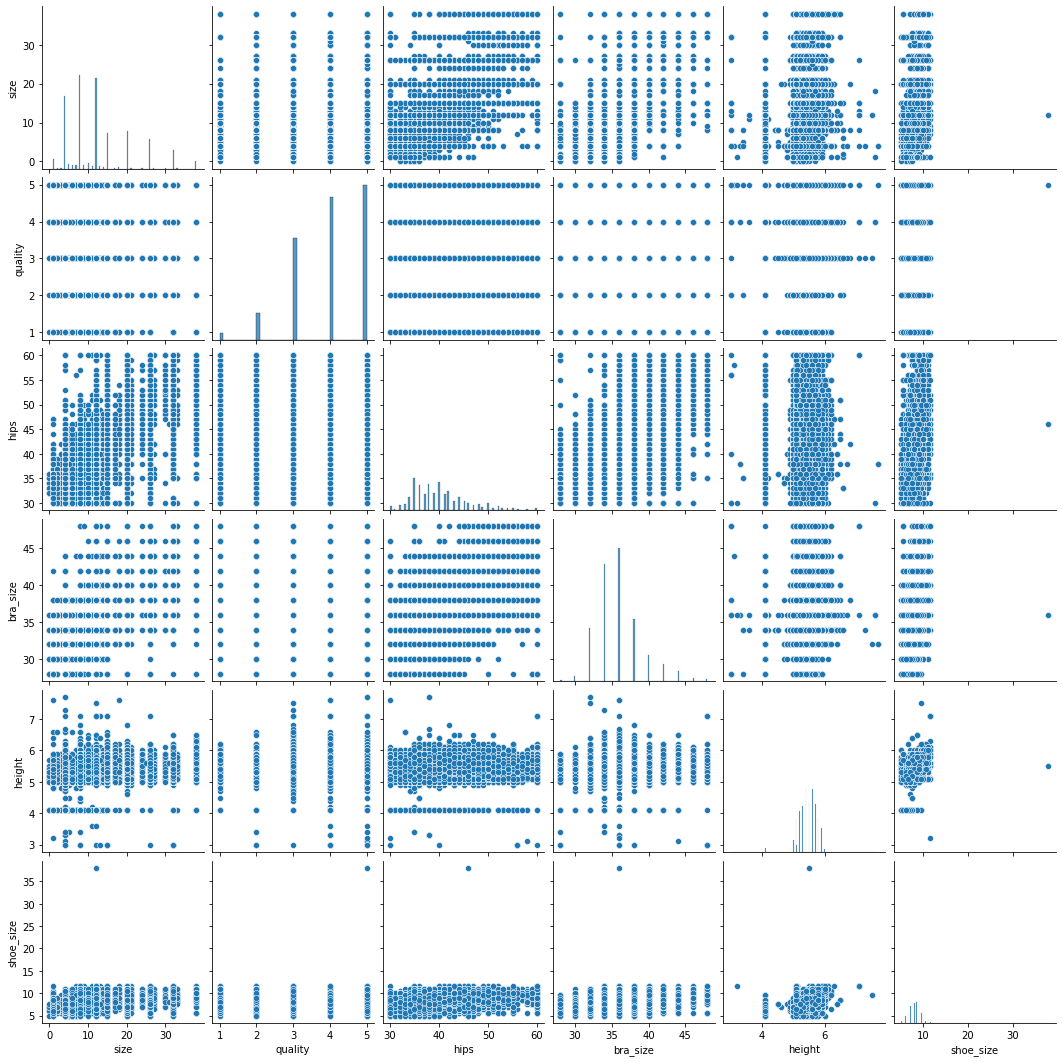

In [57]:
num=df1.select_dtypes(include=np.number)
sns.pairplot(num)
plt.show()

# Statistical Analysis:

##  1. Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%.

In [96]:
from scipy import stats

In [93]:
obs=pd.crosstab(df1['category'],df1['review_summary'])
obs

review_summary,!,!!!,!!!!,#4 for me! I'm collecting,#FashionDeux Absolutely,#FashionDeux This is the,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest,...,you get what you pay for,you have it in other colo,you know who this dress d,you need every color,you should buy every colo,you shouldn't have to spe,yup.,yup. This coat is amazing,"zipper stuck a little, bu",zipper very difficult to
category,,,,,,,,,,,,,,,,,,,,,
bottoms,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
dresses,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
new,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
outerwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
sale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tops,1,1,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
wedding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# testing hypothesis
# ho:  category feature and review summary are independent
# h1:  category feature and review summary are not independent
    
# decision criteria
alpha=0.05
chi_critical=stats.chi2.isf(alpha,(7-1)*(60927-1))

# chi contingency
stats,p_value,dof,exp=stats.chi2_contingency(obs,correction=False)
print("The chi_critical is ",chi_critical)
print('The chi2_statistics  is',stats)
print('The p_value  is',p_value)
print('The alpha is ',alpha)

The chi_critical is  366963.5696448107
The chi2_statistics  is 423622.60195542267
The p_value  is 0.0
The alpha is  0.05


## 2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.

In [97]:
# normality test
print('The shapiro of size variable is\n',stats.shapiro(df1['size']))
print('The shapiro of Hips variable is\n',stats.shapiro(df1['hips']))

The shapiro of size variable is
 ShapiroResult(statistic=0.8807517886161804, pvalue=0.0)
The shapiro of Hips variable is
 ShapiroResult(statistic=nan, pvalue=1.0)


In [100]:
# testing hypothesis
# ho: mu1-mu2=0
# ha= mu1-mu2<>0

# decision criteria
alpha=0.05
z_alpha=stats.norm.ppf(alpha/2)

# sample statistics
x1=df1['size'].mean()
x2=df1['hips'].mean()
s1=np.std(df1['size'],ddof=1)
s2=np.std(df1['hips'],ddof=1)
n1=len(df1['size'])
n2=len(df1['hips'])
z=(x1-x2)/np.sqrt(((s1**2)/n1)+((s2**2)/n2))

# p value
p_value=stats.norm.cdf(alpha)
print('The z_alpha is ',z_alpha)
print(' The z is ',z)
print('The p_value is ',(p_value*2))
print('The alpha is ',alpha)

The z_alpha is  -1.9599639845400545
 The z is  -784.3597303544988
The p_value is  1.039877611676745
The alpha is  0.05


## 3. Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals.
Check the normality of the data before the above test. Alpha = .05

In [62]:
df1['shoe_width'].unique()

array([nan, 'wide', 'average', 'narrow'], dtype=object)

In [68]:
# testing hypothesis
# ho: The average quality across all the shoe width is equal
# ha: Atleast one of the  average quality across all the shoe width is not equal

# data seperation 
dfw=df1[df1['shoe_width']=='wide']['quality']
dfa=df1[df1['shoe_width']=='average']['quality']
dfn=df1[df1['shoe_width']=='narrow']['quality']

# decision criteria
alpha=0.05
print('The alpha is ',alpha)
 
# shapiro test
w=print('The shapiro for wide category is\n ',stats.shapiro(dfw))
a=print('The shapiro for wide category is\n ',stats.shapiro(dfa))
n=print('The shapiro for wide category is\n ',stats.shapiro(dfn))

# levene test
lev=print('The levene test is\n ',stats.levene(dfw,dfa,dfn))

The alpha is  0.05
The shapiro for wide category is
  ShapiroResult(statistic=0.848232090473175, pvalue=0.0)
The shapiro for wide category is
  ShapiroResult(statistic=0.8397364020347595, pvalue=0.0)
The shapiro for wide category is
  ShapiroResult(statistic=0.8354741334915161, pvalue=4.514273810304472e-37)
The levene test is
  LeveneResult(statistic=2.590141836220442, pvalue=0.0750367582761136)


In [ ]:
# inference

In [71]:
# f_critical 
c=0.96
alpha=1-c
t=df1['shoe_width'].nunique()
N=len(df1)
f_critical=stats.f.isf(alpha,t-1,N-t)
print("The f_critical is ",f_critical)

# one way anova
f_stats,p_value=stats.f_oneway(dfw,dfa,dfn)
print('The f_statistics  is',f_stats)
print('The p_value  is',p_value)
print('The alpha is ',alpha)


The f_critical is  3.2190027317362238
The f_statistics  is 5.37881970489884
The p_value  is 0.0046205227547412514
The alpha is  0.040000000000000036


## 4. Check if the shoe width feature affects the review summary with a 99% confidence interval.

In [75]:
obs=pd.crosstab(df1['shoe_width'],df1['review_summary'])  
obs

review_summary,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest I don't,#ReviewContest I wish,#ReviewContest Love th,#ReviewContest Super c,#ReviewContest Can't st,#ReviewContest I love t,#ReviewContest I wasn't,...,what a gorgeous coat it,wish I had sized down. fe,wish it was a tad longer,with all the reviews and,wore larger than last sea,worth the investment! fi,you could probably size d,you know who this dress d,yup.,yup. This coat is amazing
shoe_width,,,,,,,,,,,,,,,,,,,,,
average,1,1,1,1,1,4,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
narrow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
wide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
# hypothesis testing
# ho: The shoe_width and review summary are independent
# ha: The shoe_width and review summary are not independent  

# decision criteria
c=0.99
alpha=1-c
chi_critical=stats.chi2.isf(alpha,(3-1)*(15486-1))

# chi contingency
stats,p_value,dof,exp=stats.chi2_contingency(obs,correction=False)
print("The chi_critical is ",chi_critical)
print('The chi2_statistics  is',stats)
print('The p_value  is',p_value)
print('The alpha is ',alpha)


The chi_critical is  31551.9151923852
The chi2_statistics  is 31444.52573752214
The p_value  is 0.0006670063784658775
The alpha is  0.010000000000000009


## 5. Check if the length feature affects the review summary with a 95% confidence interval.

In [79]:
obs=pd.crosstab(df1['length'],df1['review_summary'])
obs

review_summary,!,!!!,!!!!,#4 for me! I'm collecting,#FashionDeux Absolutely,#FashionDeux This is the,#FashionDeux I have been,#FashionDeux This skirt i,#Review ContestAlthough t,#ReviewContest,...,you get what you pay for,you have it in other colo,you know who this dress d,you need every color,you should buy every colo,you shouldn't have to spe,yup.,yup. This coat is amazing,"zipper stuck a little, bu",zipper very difficult to
length,,,,,,,,,,,,,,,,,,,,,
just right,1,1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
slightly long,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
slightly short,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
very long,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
very short,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# testing hypothesis
# ho:The length and review summary are independent
# ha:The length and review summary are not independent
    
# decision criteria
c=0.95
alpha=1-c
chi_critical=stats.chi2.isf(alpha,(5-1)*(60927-1))

# chi contingency
stats,p_value,dof,exp=stats.chi2_contingency(obs,correction=False)
print("The chi_critical is ",chi_critical)
print('The chi2_statistics  is',stats)
print('The p_value  is',p_value)
print('The alpha is ',alpha)


The chi_critical is  244853.48407614353
The chi2_statistics  is 261881.71856577834
The p_value  is 8.078454692519555e-143
The alpha is  0.050000000000000044


## 6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha. Check the normality of the data before the above test. Alpha = .05

In [83]:
df1['fit'].unique()

array(['small', 'large', 'fit'], dtype=object)

In [92]:
# hypothesis testing
# ho: The average quality are equal for all different kinds of fits
# ho: Atleast average quality are not equal for one different kinds of fits
    
# decison criteria
alpha=0.05

# data seperation
dfs=df1[df1['fit']=='small']['quality']
dfl=df1[df1['fit']=='large']['quality']
dff=df1[df1['fit']=='fit']['quality']

# normality
print('The shapiro test value for small catergory is\n ',stats.shapiro(dfs))
print('The shapiro test value for large catergory is\n ',stats.shapiro(dfl))
print('The shapiro test value for fit catergory is\n ',stats.shapiro(dff))

# levene test
print('The levene test is\n ',stats.levene(dfs,dfl,dff))
print('The alpha is ',alpha)


The shapiro test value for small catergory is
  ShapiroResult(statistic=0.9018688797950745, pvalue=0.0)
The shapiro test value for large catergory is
  ShapiroResult(statistic=0.8691762089729309, pvalue=0.0)
The shapiro test value for fit catergory is
  ShapiroResult(statistic=0.8249763250350952, pvalue=0.0)
The levene test is
  LeveneResult(statistic=339.33141601410875, pvalue=1.7352151712788378e-147)
The alpha is  0.05


In [91]:
# f_critical
t=df1['fit'].nunique()
N=len(df1)
f_critical=stats.f.isf(alpha,t-1,N-t)

# f one way
f_stats,p_value=stats.f_oneway(dfs,dfl,dff)
print("The f_critical is ",f_critical)
print('The f_statistics  is',f_stats)
print('The p_value  is',p_value)
print('The alpha is ',alpha)


The f_critical is  2.9958421948692653
The f_statistics  is 2132.9243887750604
The p_value  is 0.0
The alpha is  0.05
